In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
moons = make_moons(n_samples=200, noise=0.1, random_state=0)
moons

(array([[ 7.92357355e-01,  5.02648573e-01],
        [ 1.63158315e+00, -4.63896705e-01],
        [-6.71092674e-02,  2.67767057e-01],
        [-1.04412427e+00, -1.82607610e-01],
        [ 1.76704822e+00, -1.98609868e-01],
        [ 1.90607398e+00, -7.10915927e-02],
        [ 9.62192129e-01,  2.61986075e-01],
        [ 8.86813848e-01, -4.84896235e-01],
        [ 8.68935196e-01,  3.61092776e-01],
        [ 1.15352953e+00, -5.72352929e-01],
        [-3.70714493e-01,  7.21655833e-01],
        [ 1.95523229e-01, -2.64439358e-01],
        [ 1.80949658e+00, -1.94707885e-01],
        [ 1.29046617e+00, -3.23893778e-01],
        [-8.23662620e-01,  7.17643700e-01],
        [ 9.85881879e-01,  1.96706218e-01],
        [ 5.81943503e-01,  9.06311048e-01],
        [ 2.76118902e-01, -2.87451069e-01],
        [ 3.17284813e-01,  8.54200996e-01],
        [-8.52697952e-01,  9.32383274e-01],
        [ 1.97796688e+00,  1.04796611e-02],
        [ 8.64249290e-01, -4.63242870e-01],
        [ 2.57499053e-01,  1.003

In [4]:
X = moons[0]
y = moons[1]

[]

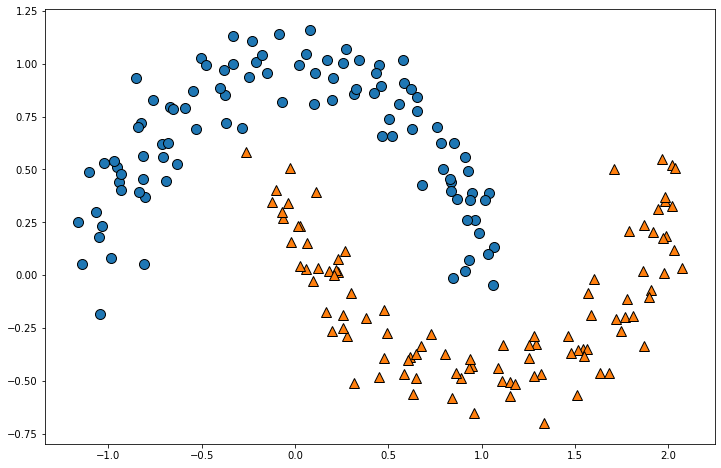

In [5]:
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.plot()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Text(0, 0.5, '$x_1$')

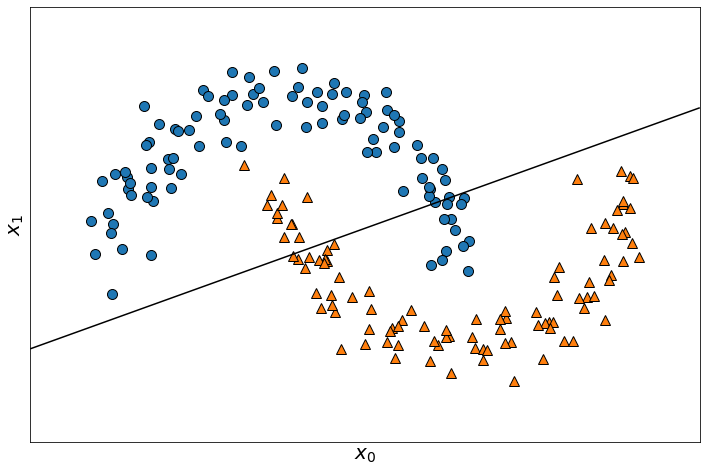

In [8]:
lin_svm = LinearSVC().fit(X_train_scaled, y_train)
plt.figure(figsize=(12, 8))
mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

print(X_train_poly.shape)
print(X_test_poly.shape)

(150, 10)
(50, 10)


In [18]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [19]:
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)
lin_svm = LinearSVC().fit(X_train_poly_scaled, y_train)
lin_svm.predict(X_test_poly_scaled) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [22]:
from sklearn.pipeline import Pipeline

poly_svm = Pipeline([
    ('Poly', PolynomialFeatures(degree=3)),
    ('Scaler', StandardScaler()),
    ('svm', LinearSVC()),
])

poly_svm.fit(X, y)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=3)),
                ('Scaler', StandardScaler()), ('svm', LinearSVC())])

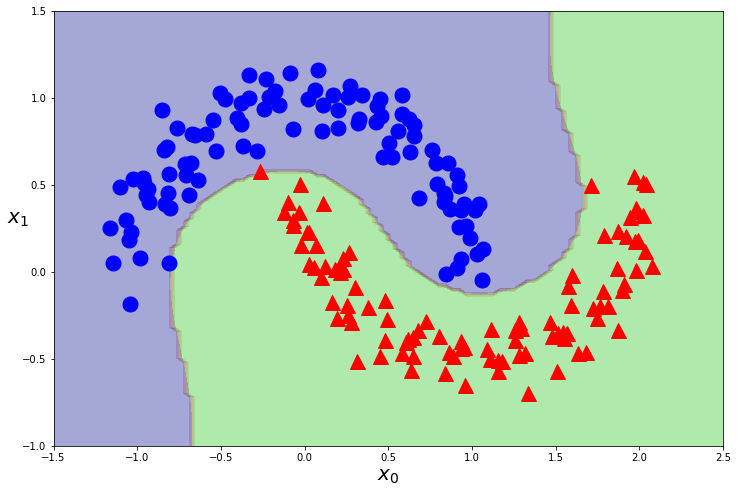

In [26]:
def plot_decision_function(model):
    _x0 = np.linspace(-1.5, 2.5, 100)
    _x1 = np.linspace(-1.0, 1.5, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X).reshape(x0.shape)
    y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)

def plot_dataset(X, y):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bo', ms=15)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r^', ms=15)
    plt.xlabel('$x_0$', fontsize=20)
    plt.ylabel('$x_1$', fontsize=20, rotation=0)

plt.figure(figsize=(12, 8))
plot_decision_function(poly_svm)
plot_dataset(X, y)
plt.show()

In [27]:
from sklearn.svm import SVC

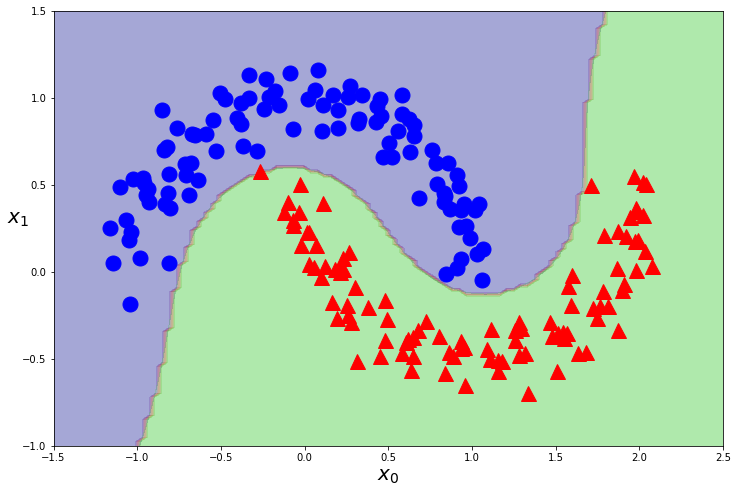

In [28]:
kernel_svm = Pipeline([
    ('Scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1)),
])

kernel_svm.fit(X, y)

plt.figure(figsize=(12, 8))
plot_decision_function(kernel_svm)
plot_dataset(X, y)
plt.show()

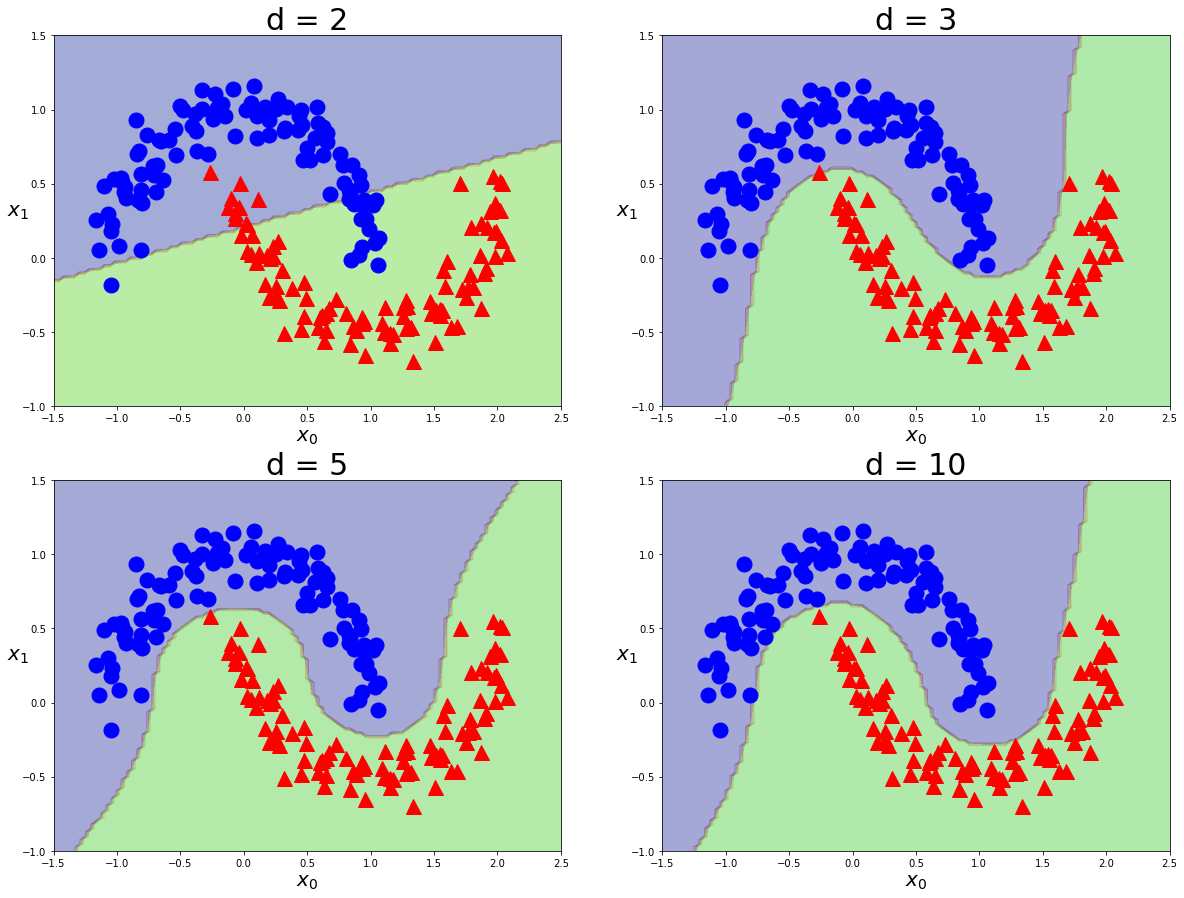

In [31]:
plt.figure(figsize=(20, 15))

for i, degree in enumerate([2, 3, 5, 10]):
    poly_kernel_svm = Pipeline([
        ('Scaler', StandardScaler()),
        ('svm', SVC(kernel='poly', degree=degree, coef0=1)),
    ])
    poly_kernel_svm.fit(X, y)
    
    plt.subplot(221 + i)
    plot_decision_function(poly_kernel_svm)
    plot_dataset(X, y)
    plt.title('d = {}'.format(degree), fontsize=30)

plt.show()